## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [1]:
import csv
import matplotlib.pyplot as plt

# Funktion for att hitta minsta varde
def find_min(prices):
    min_price = float('inf')
    for price in prices:
        if price < min_price:
            min_price = price
    return min_price

# Fuktion for att hitta max varde
def find_max(prices):
    max_price = float('-inf')
    for price in prices:
        if price > max_price:
            max_price = price
    return max_price

# Funktion for att hitta medelvarde
def find_mean(prices):
    total = sum(prices)
    mean = total / len(prices)
    return mean

## Deluppgift 1
Ev. kommentar: 

In [2]:
# Tar ett filnamn som argument och returnerar en lista med innehallet
def read_file(file_name):
    data = []
    with open(file_name, 'r', newline='') as file:
        reader = csv.reader(file, delimiter=';')
        for row in reader:
            data.append(row)
    return data				

lghpriser = 'lghpriser.csv'	
villapriser = 'villapriser.csv'

lghData = read_file(lghpriser)
villaData = read_file(lghpriser)

print("Innehåll i lghData:")
for i in range(3):
    print(lghData[i])  # Skriver ut 3 forsta raderna

print("\nInnehåll i villaData:")
for i in range(3):
    print(villaData[i])

Innehåll i lghData:
['Ar', 'manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '64.12', '63.98', '67.81', '63.87', '63.76', '67.92', '64.95', '65.31', '68.28', '66.07', '66.34', '69.38']
['2018', 'februari', '66.01', '64.29', '77.14', '65.82', '63.96', '77.42', '67.04', '65.54', '77.96', '68.02', '66.58', '78.91']

Innehåll i villaData:
['Ar', 'manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '64.12', '63.98', '67.81', '63.87', '63.76', '67.92', '64.95', '65.31', '68.28', '66.07', '66.34', '69.38']
['2018', 'februari', '66.01'

## Deluppgift 2
Ev. kommentar:

Ange prisområde (1-4):  3
Ange årtalet som ska presenteras (2018-2023):  2022


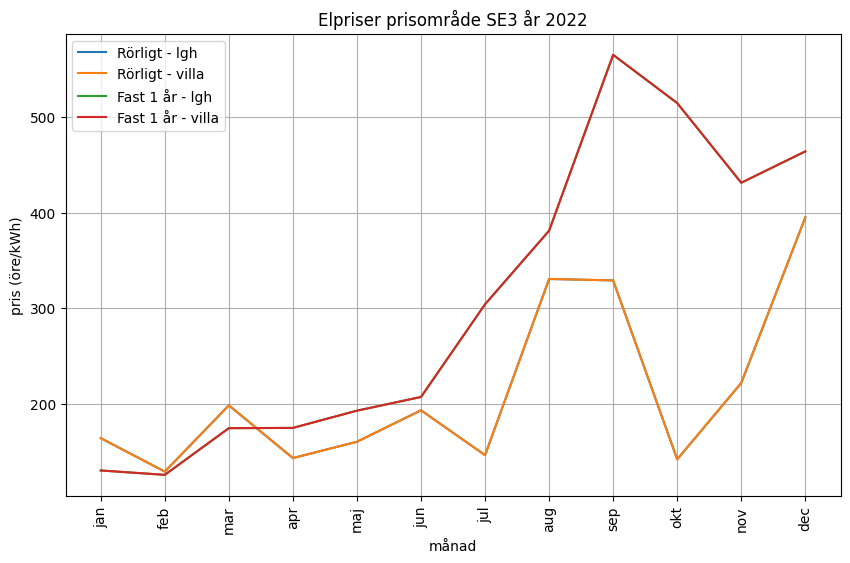

In [5]:
# Funktion som extraherar data och plottar elpriser i linjediagram
def plot_prices(prices_lgh, prices_villa, title, prisomrade):
    year_index = 0
    month_index = 1
    fixed_prices_1year_index = [2, 5, 8, 11]
    variable_prices_index = [4, 7, 10, 13]
    years = sorted(set(entry[year_index] for entry in prices_lgh[1:]))  # Extraherar artal
    all_months = [
        'januari', 'februari', 'mars', 'april', 'maj', 'juni',
        'juli', 'augusti', 'september', 'oktober', 'november', 'december'
    ]
    # Skapar listor for datan som ska plottas
    variable_prices_lgh = []
    variable_prices_villa = []
    fixed_prices_1year_lgh = []
    fixed_prices_1year_villa = []
	# Loopar igenom varje ar
    for year in years:
        year_data_lgh = {  # Filtrerar data for lghpriser aktuellt ar
            entry[month_index]: entry 
            for entry in prices_lgh 
            if entry[year_index] == year
            }
        year_data_villa = {  # Filtrerar data for villapriser aktuellt ar
            entry[month_index]: entry 
            for entry in prices_villa 
            if entry[year_index] == year
            }
        # Loopar igenom alla manader, kollar om data for aktuell manad existerar
        for month in all_months:
            if month in year_data_lgh:
                variable_prices_lgh.append(  # Laggs till i listan
                    float(year_data_lgh[month][variable_prices_index[prisomrade - 1]]))
                fixed_prices_1year_lgh.append( 
                    float(year_data_lgh[month][fixed_prices_1year_index[prisomrade - 1]]))
            else:
                variable_prices_lgh.append(None)  # Om data saknas for aktuell manad
                fixed_prices_1year_lgh.append(None)
            # Upprepar samma procedur for villa
            if month in year_data_villa:
                variable_prices_villa.append(
                    float(year_data_villa[month][variable_prices_index[prisomrade - 1]]))
                fixed_prices_1year_villa.append(
                    float(year_data_villa[month][fixed_prices_1year_index[prisomrade - 1]]))
            else:
                variable_prices_villa.append(None)
                fixed_prices_1year_villa.append(None)
    
	#  Skapar labels till x-axeln genom att korta ned manader till 3 tecken
    month_labels = [month[:3] for month in all_months * len(years)]
    
    # Plottar diagram
    plt.figure(figsize=(10, 6))
    plt.plot(all_months * len(years), variable_prices_lgh, label='Rörligt - lgh')
    plt.plot(all_months * len(years), variable_prices_villa, label='Rörligt - villa')
    plt.plot(all_months * len(years), fixed_prices_1year_lgh, label='Fast 1 år - lgh')
    plt.plot(all_months * len(years), fixed_prices_1year_villa, label='Fast 1 år - villa')
    plt.title(title)
    plt.xlabel('månad')
    plt.ylabel('pris (öre/kWh)')
    plt.grid(True)
    plt.legend()
    plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=90)
    plt.show()

prisomrade_input = input("Ange prisområde (1-4): ")
ar_input = input("Ange årtalet som ska presenteras (2018-2023): ")

# Felhantering user input
try:
    prisomrade = int(prisomrade_input)
    year = int(ar_input)
except ValueError:
    print("Ogiltigt format. Ange prisområde som heltal 1-4 och år mellan 2018-2023.")
    exit()

if 1 <= prisomrade <= 4 and 2018 <= year <= 2023:
    prisomrade_text = f"SE{prisomrade}"
    title = f"Elpriser prisområde {prisomrade_text} år {year}"
    
    # Skapar nya listor med data filtrerad utifran angivet ar och prisomrade
    filtered_data_lgh = [
        entry for entry in lghData 
        if entry[0] == str(year)
        ]
    filtered_data_villa = [
        entry for entry in villaData 
        if entry[0] == str(year)
        ]
    
    #  Om data existerar i listorna, kallas funktion som skapar diagram
    if len(filtered_data_lgh) > 1 and len(filtered_data_villa) > 1:
        plot_prices(filtered_data_lgh, filtered_data_villa, title, prisomrade)
    else:
        print(f"Ingen data finns för {prisomrade_text} och år {year}.")
else:
    print("Ogiltigt prisområde eller år. Programmet avslutas.")

## Deluppgift 3
Ev. kommentar:

In [4]:
# Funktion for att hitta medianvarde
def find_median(prices):
    sorted_prices = sorted(prices)
    n = len(sorted_prices)
    mid = n // 2
    if n % 2 == 0:
        median = (sorted_prices[mid - 1] + sorted_prices[mid]) / 2
    else:
        median = sorted_prices[mid]
    return median

# Funktion som nalyserar priser, skapar tabell och diagram
def analyze_prices(prices, category, year):
    year_index = 0
    month_index = 1
    pris_index_rorligt = [4, 7, 10, 13]
    pris_index_fast_3year = [3, 6, 9, 12]
    
    print(f"              Analys av elpriserna för kategorin {category} år {year}")
    print("          rörligt pris (öre/kWh)                        fast pris 3 år (öre/kWh)")
    print("{:<12}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}".format(
        "Prisomr.", "min -- (mån)", "max -- (mån)", "medel", "median",
        "min -- (mån)", "max -- (mån)", "medel", "median"))
    print("-" * 100)

    prisomraden = []
    min_variable_prices = []
    max_variable_prices = []
    mean_variable_prices = []
    median_variable_prices = []
    min_fixed_3year_prices = []
    max_fixed_3year_prices = []
    mean_fixed_3year_prices = []
    median_fixed_3year_prices = []

    for prisomrade in range(1, 5):
        prisomrade_text = f"SE{prisomrade}"

        variable_prices = [
            float(entry[pris_index_rorligt[prisomrade - 1]]) for entry in prices 
            if entry[year_index] == str(year)
        ]
        fixed_prices_3year = [
            float(entry[pris_index_fast_3year[prisomrade - 1]]) for entry in prices 
            if entry[year_index] == str(year)
        ]
        min_variable = find_min(variable_prices)
        max_variable = find_max(variable_prices)
        mean_variable = find_mean(variable_prices)
        median_variable = find_median(variable_prices)

        min_fixed_3year = find_min(fixed_prices_3year)
        max_fixed_3year = find_max(fixed_prices_3year)
        mean_fixed_3year = find_mean(fixed_prices_3year)
        median_fixed_3year = find_median(fixed_prices_3year)
        
        min_month_variable = prices[variable_prices.index(min_variable) + 1][month_index]
        max_month_variable = prices[variable_prices.index(max_variable) + 1][month_index]
        min_month_fixed = prices[fixed_prices_3year.index(min_fixed_3year) + 1][month_index]
        max_month_fixed = prices[fixed_prices_3year.index(max_fixed_3year) + 1][month_index]

        prisomraden.append(prisomrade_text)
        min_variable_prices.append(min_variable)
        max_variable_prices.append(max_variable)
        mean_variable_prices.append(mean_variable)
        median_variable_prices.append(median_variable)
        min_fixed_3year_prices.append(min_fixed_3year)
        max_fixed_3year_prices.append(max_fixed_3year)
        mean_fixed_3year_prices.append(mean_fixed_3year)
        median_fixed_3year_prices.append(median_fixed_3year)

        print("{:<12}{:<12}{:<12}{:<10}{:<10}{:<12}{:<12}{:<10}{:<10}".format(
            prisomrade_text,
            f"{min_variable:.2f} {min_month_variable[:3]}", 
            f"{max_variable:.2f} {max_month_variable[:3]}", 
            f"{mean_variable:.2f}", f"{median_variable:.2f}",
            f"{min_fixed_3year:.2f} {min_month_fixed[:3]}", 
            f"{max_fixed_3year:.2f} {max_month_fixed[:3]}", 
            f"{mean_fixed_3year:.2f}", f"{median_fixed_3year:.2f}"
		))
    print("=" * 100)
	# Plottar bar graph Rorligt pris
    bar_width = 0.2
    bar_positions_min = list(range(1, 5))
    bar_positions_max = [pos + bar_width for pos in bar_positions_min]
    bar_positions_mean = [pos + 2 * bar_width for pos in bar_positions_min]
    bar_positions_median = [pos + 3 * bar_width for pos in bar_positions_min]
    
    plt.figure(figsize=(13, 7))
    plt.subplot(1, 2, 1)
    plt.bar(bar_positions_min, min_variable_prices, width=bar_width, label='rörligt min')
    plt.bar(bar_positions_max, max_variable_prices, width=bar_width, label='rörligt max')
    plt.bar(bar_positions_mean, mean_variable_prices, width=bar_width, label='rörligt medel')
    plt.bar(bar_positions_median, median_variable_prices, width=bar_width, label='rörligt median')
    plt.xticks(bar_positions_min, prisomraden)
    plt.xticks(rotation=90)
    plt.title(f'Elpriser rörligt för {category} i prisområden SE1-SE4 år {year}')
    plt.xlabel('prisområden')
    plt.ylabel('pris (öre/kWh)')
    plt.legend()

	# Bar graph for Fast pris 3 år
    bar_positions_min = list(range(1, 5))
    bar_positions_max = [pos + bar_width for pos in bar_positions_min]
    bar_positions_mean = [pos + 2 * bar_width for pos in bar_positions_min]
    bar_positions_median = [pos + 3 * bar_width for pos in bar_positions_min]
    
    plt.subplot(1, 2, 2)
    plt.bar(bar_positions_min, min_fixed_3year_prices, width=bar_width, label='fast 3 år - min')
    plt.bar(bar_positions_max, max_fixed_3year_prices, width=bar_width, label='fast 3 år - max')
    plt.bar(bar_positions_mean, mean_fixed_3year_prices, width=bar_width, label='fast 3 år - medel')
    plt.bar(bar_positions_median, median_fixed_3year_prices, width=bar_width, label='fast 3 år - median')
    plt.xticks(bar_positions_min, prisomraden)
    plt.xticks(rotation=90)
    plt.title(f'Elpriser fast 3 år för {category} i prisområden SE1-SE4 år {year}')
    plt.xlabel('prisområden')
    plt.ylabel('pris (öre/kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

category_input = input("Lägenhetskund (L) eller villakund (V)? :").upper()
if category_input not in ['L', 'V']:
    print("Ogiltig kundkategori. Programmet avslutas.")
    exit()
year_input = input("Ange årtalet som ska presenteras (2018-2023): ")

try:
    year = int(year_input)
except ValueError:
    print("Ogiltigt format för årtal.")
    exit()
    
if not (2018 <= year <= 2023):
    print("Ogiltigt årtal. Programmet avslutas.")
    exit()

if category_input == 'L':
    prices = lghData
    category_text = "lägenhetskund"
elif category_input == 'V':
    prices = villaData
    category_text = "villakund"
else:
    print("Ogiltig kundkategori. Programmet avslutas.")
    exit()

# Analyserar och printar priser
prisomraden = analyze_prices(prices, category_text, year)

KeyboardInterrupt: Interrupted by user

## Deluppgift 4
Ev. kommentar:

In [ ]:
# Funktion som genererar listor for varje ar
def generate_year_lists(start_year, end_year, data, column_index):
    year_lists = {}
    for year in range(start_year, end_year + 1):
        if year == 2017:
            # For ar 2017, fyll m 0 for jan-nov och anvand jan 2018 for Dec (FF jan-18 = 0)
            jan_2018_value = float(data[1][column_index['R']])
            year_lists[year] = [0] * 11 + [jan_2018_value]
        elif year == 2018:
            # For 2018, skapa lista m varden jan-dec
            year_lists[year] = [
                float(data[row][column_index['R']]) for row in range(1, 13)
                ]
        elif year == 2023:
            start_row = (year - 2018) * 12 + 1
            end_row = start_row + 6  # 2023 har bara data till juli
    		# Generera lista for 2023 m data jan-juli
            year_lists[year] = [
                float(data[row][column_index['R']]) 
                for row in range(start_row, end_row + 1)] + [0] * 5  # Manader 8-12 satts till 0
            year_lists[year][7] = year_lists[year][6]  # Satt samma data for aug som juli (FF = 0)
        else:
            start_row = (year - 2018) * 12 + 1
            end_row = start_row + 11
            # Generera listor for ovriga ar
            year_lists[year] = [
                float(data[row][column_index['R']]) 
                for row in range(start_row, end_row + 1)
                ]
    return year_lists

# Funktion for att berakna forandringsfaktor
def calculate_change_factors(year_lists):
    change_factors = {}
    for year, values in year_lists.items():
        change_factors[year] = []
        for i in range(len(values)):
            if year == 2017 and i == 0:
                # Skippa jan 2017
                continue
            elif i == 0:
                # Rakna forandringsfaktor for jan jamfort m dec foregaende ar
                prev_month_value = year_lists[year - 1][-1]
            else:
                # Berakna forandringsfaktor for ovriga manader
                prev_month_value = values[i - 1]                
            current_value = values[i]            
            # Satt forandringsfaktor for aug-dec 2023 till 0.00
            if year == 2023 and i >= 7:
                change_factors[year].append(0.00)
                continue 
            if prev_month_value == 0:  # Hantera nolldivision
                change_factor = 0
            else:
                change_factor = (
                    (current_value - prev_month_value) / prev_month_value) * 100
            change_factors[year].append(change_factor)
    return change_factors

# Funktion for att plotta bar graph
def plot_change_factor_bar_graph(year_input, area_input, category_text, 
                                 agreement_input, change_factors):
    change_factors_year = change_factors[year_input]
    months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", 
              "aug", "sep", "oct", "nov", "dec"]
    category_text = {
        'V': 'villakund', 'L': 'lägenhetskund'}.get(category_text, category_text)
    agreement_input = {
        'R': 'rörligt', 'F1': 'Fast 1 år', 'F3': 'Fast 3 år'}.get(agreement_input, agreement_input)

    plt.figure(figsize=(10, 6))
    plt.bar(months, change_factors_year, color='red', width=0.4)
    plt.title(f'Månatlig förändring av elpriset för {category_text} i prisområde SE{area_input} år {year_input}')
    plt.xlabel('månad')
    plt.ylabel('förändring [%]')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(True)
    plt.legend([f'{agreement_input}'])
    plt.show()

category_input = input("Lägenhetskund (L) eller villakund (V)? : ").upper()
agreement_input = input("Ange prisavtal (R/F1/F3): ").upper()
area_input = int(input("Ange prisområde (1-4): "))
year_input = int(input("Ange önskat årtal (2018-2023): "))

data = lghData if category_input == 'L' else villaData

column_index = {
    'R': 13 if area_input == 4 else 4 * (area_input - 1) + 4,
    'F1': 13 if area_input == 4 else 4 * (area_input - 1) + 2,
    'F3': 13 if area_input == 4 else 4 * (area_input - 1) + 3
}
year_lists = generate_year_lists(2017, 2023, data, column_index)
change_factors = calculate_change_factors(year_lists)
plot_change_factor_bar_graph(year_input, area_input, category_input, 
                             agreement_input, change_factors)

## Deluppgift 5
Ev. kommentar: 

In [ ]:
# Extrahera kolumner startar m SE och namnger listor
def extract_SE_columns(file_name):
    data = read_file(file_name)
    se_columns = {}
    # Skapar dictionary med SE-kolumner
    for idx, column in enumerate(data[0]):
        if column.startswith('SE'):
            se_columns[column] = [float(row[idx]) for row in data[1:]]
    return se_columns

def print_header(prisavtal):
    print ("=" * 80, "\n\n")
    print(f"              Lägsta- högsta- och medelvärde av elpriserna")
    print(f"              under tidsperioden 2018-2023 for {prisavtal}\n\n")
    print("{:<12}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}".format(
        "Prisomr.", "lägsta", "år", "mån", "högsta",
        "år", "mån", "medel"))
    print("-" * 80)

# Filtrerar statistik for SE kolumner och printar output samt lagger till varden i listor
def filter_and_print_statistics(se_columns, prisavtal, data, statistics_list):
    for se_type in range(1, 5):
        column_name = f"SE{se_type}-{prisavtal}"
        if column_name in se_columns:
            min_value = find_min(se_columns[column_name])
            max_value = find_max(se_columns[column_name])
            mean_value = find_mean(se_columns[column_name])
            
            # Extrahera row index min, max, medel i dataset
            min_row_index = se_columns[column_name].index(min_value) + 1  # Skippa header row
            max_row_index = se_columns[column_name].index(max_value) + 1 
            
            # Hitta ar och manad
            min_year = data[min_row_index][0]
            min_month = data[min_row_index][1][:3]
            max_year = data[max_row_index][0]
            max_month = data[max_row_index][1][:3]

            # Lagger till dictionary med key-value pairs till lista, for att anvanda till diagrammen
            statistics_list.append({
                'SE_Type': f"SE{se_type}",
                'Min_Value': min_value,
                'Max_Value': max_value,
                'Mean_Value': mean_value
            })
            # Printar tabellen
            print("{:<12}{:<10.2f}{:<10}{:<10}{:<10.2f}{:<10}{:<10}{:<10.2f}".format(
                f"SE{se_type}", min_value, min_year, min_month, 
                max_value, max_year, max_month, mean_value))

# Meta-funktion for att fa diagrammen bredvid varandra
def create_side_by_side_scatter_plots(lgh_statistics, villa_statistics, prisavtal):
    def create_scatter_plot(ax, statistics, customer_type):
        SE_types = [entry['SE_Type'] for entry in statistics]
        min_values = [entry['Min_Value'] for entry in statistics]
        max_values = [entry['Max_Value'] for entry in statistics]
        mean_values = [entry['Mean_Value'] for entry in statistics]

        ax.scatter(SE_types, min_values, label='lägsta elpris', marker='o')
        ax.scatter(SE_types, max_values, label='högsta elpris', marker='o')
        ax.scatter(SE_types, mean_values, label='medelvärde', marker='o')
        ax.set_title(f"Elpriser\nLägsta-, högsta- och medelvärde under tidsperioden 2018-2023\nKategori {customer_type} - {prisavtal}")
        ax.set_xlabel('prisområden')
        ax.set_ylabel('pris (öre/kWh)')
        ax.legend()
        ax.grid(True)
        ax.set_xticks(range(len(SE_types)))
        ax.set_xticklabels(SE_types, rotation=90)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    create_scatter_plot(ax1, lgh_statistics, 'lägenhetskund') 
    create_scatter_plot(ax2, villa_statistics, 'villakund')
    plt.tight_layout()
    plt.show()

lgh_SE_columns = extract_SE_columns(lghpriser)
villa_SE_columns = extract_SE_columns(villapriser)

# Listor for berakningar som gors i filter_and_print_statistics, som sedan anvands till diagrammen
lgh_statistics = []
villa_statistics = []

prisavtal_input = input("Ange prisavtal (R, F1, F3): ").upper()

# Anvands till rubriken i diagrammen
if prisavtal_input in ["R", "F1", "F3"]:
    if prisavtal_input == "R":
        prisavtal_text = "rörligt avtal"
    elif prisavtal_input == "F1":
        prisavtal_text = "fast pris 1 år"
    else:
        prisavtal_text = "fast pris 3 år"

# Kollar user input och printar statistik utifran det
if prisavtal_input == "R":
    print_header("rörligt avtal")
    print("\nKategori lägenhetskund:")
    filter_and_print_statistics(lgh_SE_columns, "Rorligt pris", lghData, lgh_statistics)
    print("\nKategori villakund:")
    filter_and_print_statistics(villa_SE_columns, "Rorligt pris", villaData, villa_statistics)
    print ("=" * 80)
elif prisavtal_input == "F1":
    print_header("fast pris 1 år")
    print("\nKategori lägenhetskund:")
    filter_and_print_statistics(lgh_SE_columns, "Fast pris 1 ar", lghData, lgh_statistics)
    print("\nKategori villakund:")
    filter_and_print_statistics(villa_SE_columns, "Fast pris 1 ar", villaData, villa_statistics)
    print ("=" * 80)
elif prisavtal_input == "F3":
    print_header("fast pris 3 år")
    print("\nKategori lägenhetskund:")
    filter_and_print_statistics(lgh_SE_columns, "Fast pris 3 ar", lghData, lgh_statistics)
    print("\nKategori villakund:")
    filter_and_print_statistics(villa_SE_columns, "Fast pris 3 ar", villaData, villa_statistics)
    print ("=" * 80)
else:
    print("Ogiltigt format. Var god ange R, F1, eller F3.")
    
# Skapar diagram
create_side_by_side_scatter_plots(lgh_statistics, villa_statistics, prisavtal_text)